<a href="https://colab.research.google.com/github/yogananda26/Machine_Learning/blob/master/smoking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Importing the data

In [ ]:
#this is for inserting the csv file from web
!wget "https://raw.githubusercontent.com/yogananda26/Machine_Learning/master/weatherAUS.csv/smoking.csv"
df = pd.read_csv("smoking.csv")
# this is for printing the data
df.describe

--2024-07-18 03:33:09--  https://raw.githubusercontent.com/yogananda26/Machine_Learning/master/weatherAUS.csv/smoking.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185262 (181K) [text/plain]
Saving to: ‘smoking.csv’

smoking.csv         100%[===================>] 180.92K  --.-KB/s    in 0.1s    

2024-07-18 03:33:10 (1.50 MB/s) - ‘smoking.csv’ saved [185262/185262]



<bound method NDFrame.describe of       Unnamed: 0  gender  age marital_status highest_qualification  \
0              1    Male   38       Divorced      No Qualification   
1              2  Female   42         Single      No Qualification   
2              3    Male   40        Married                Degree   
3              4  Female   40        Married                Degree   
4              5  Female   39        Married          GCSE/O Level   
...          ...     ...  ...            ...                   ...   
1686        1687    Male   22         Single      No Qualification   
1687        1688  Female   49       Divorced      Other/Sub Degree   
1688        1689    Male   45        Married      Other/Sub Degree   
1689        1690  Female   51        Married      No Qualification   
1690        1691    Male   31        Married                Degree   

     nationality ethnicity      gross_income     region smoke  amt_weekends  \
0        British     White    2,600 to 5,200  The North    No           NaN   
1        British     White       Under 2,600  The North   Yes          12.0   
2        English     White  28,600 to 36,400  The North    No           NaN   
3        English     White  10,400 to 15,600  The North    No           NaN   
4        British     White    2,600 to 5,200  The North    No           NaN   
...          ...       ...               ...        ...   ...           ...   
1686    Scottish     White    2,600 to 5,200   Scotland    No           NaN   
1687     English     White    2,600 to 5,200   Scotland   Yes          20.0   
1688    Scottish     White   5,200 to 10,400   Scotland    No           NaN   
1689     English     White    2,600 to 5,200   Scotland   Yes          20.0   
1690    Scottish     White  10,400 to 15,600   Scotland    No           NaN   

      amt_weekdays         type  
0              NaN          NaN  
1             12.0      Packets  
2              NaN          NaN  
3              NaN          NaN  
4              NaN          NaN  
...            ...          ...  
1686           NaN          NaN  
1687          20.0  Hand-Rolled  
1688           NaN          NaN  
1689          20.0      Packets  
1690           NaN          NaN  

[1691 rows x 13 columns]>

In [ ]:
df

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets


# EDA things

# Group by Age

In [ ]:
#this is for grouping by gender
group_by_gender = df.groupby(['gender','smoke']).size().unstack(fill_value=0)
group_by_gender

smoke,No,Yes
gender,,
Female,731,234
Male,539,187


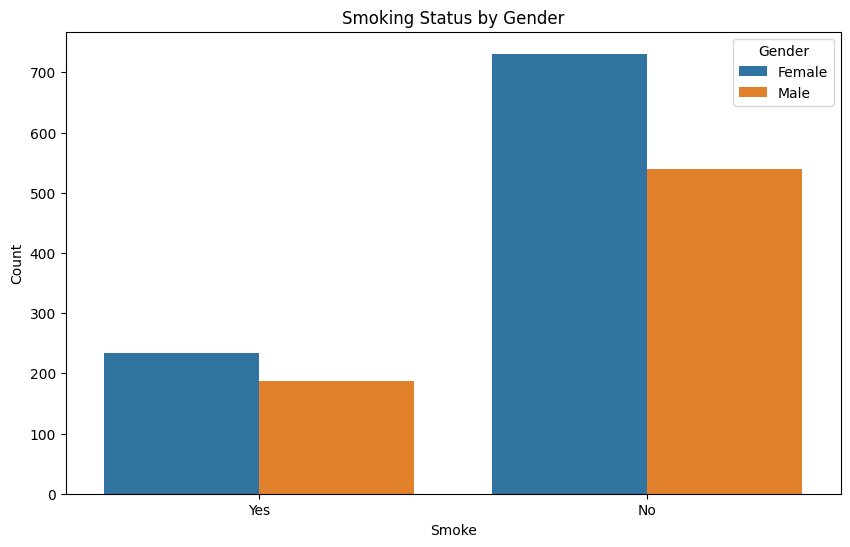

In [ ]:
df_grouped = group_by_gender.reset_index().melt(id_vars='gender', value_vars=['Yes', 'No'], var_name='smoke', value_name='count')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sb.barplot(data=df_grouped, x='smoke', y='count', hue='gender')
plt.title('Smoking Status by Gender')
plt.xlabel('Smoke')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# Group by Qualification

In [ ]:
#this is for grouping by qualification
group_by_qualification = df.groupby(['marital_status', 'smoke']).size().unstack(fill_value=0)
group_by_qualification

smoke,No,Yes
marital_status,,
Divorced,103,58
Married,669,143
Separated,46,22
Single,269,158
Widowed,183,40


In [ ]:
group_by_qualification = df.groupby(['gross_income', 'smoke']).size().unstack(fill_value=0)
group_by_qualification

smoke,No,Yes
gross_income,,
"10,400 to 15,600",185,83
"15,600 to 20,800",143,45
"2,600 to 5,200",193,64
"20,800 to 28,600",117,38
"28,600 to 36,400",70,9
"5,200 to 10,400",289,107
"Above 36,400",74,15
Refused,87,21
"Under 2,600",97,36


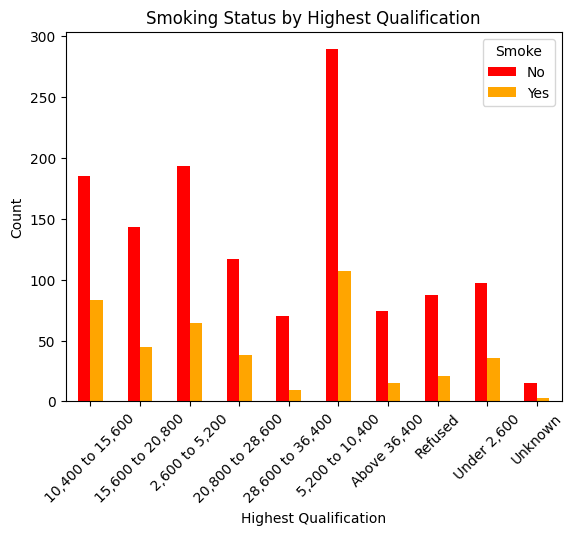

In [ ]:
colors=['red', 'orange']
group_by_qualification.plot(kind='bar', color=colors)
plt.title('Smoking Status by Highest Qualification')
plt.xlabel('Highest Qualification')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Smoke')
plt.show()

# Group By Age

In [ ]:
bins = np.linspace(df['age'].min(), df['age'].max(), 11)
labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(len(bins)-1)]
categorical = [f'{i}' for i in range(len(bins)-1)]
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
group_by_age = df.groupby(['age_range', 'smoke']).size().unstack(fill_value=0)
group_by_age['total'] = group_by_age.sum(axis=1)
group_by_age['probability_smokers'] = group_by_age['Yes'] / group_by_age['total']

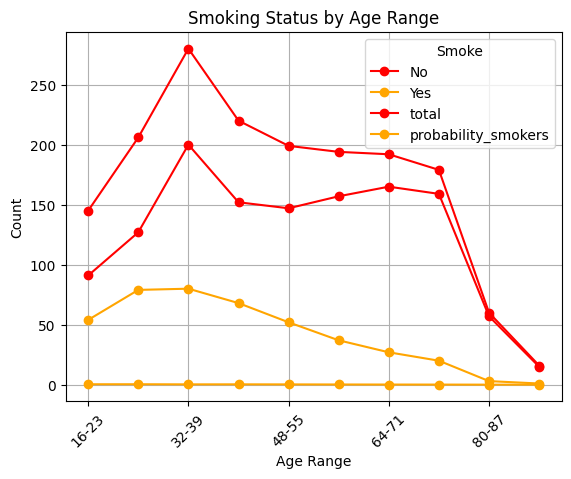

In [ ]:
group_by_age.plot(marker='o', color=['red','orange'])
plt.title('Smoking Status by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Smoke')
plt.grid(True)  # Add grid lines for better visualization
plt.show()

# Group By Nationality

In [ ]:
#this is for grouping the nationality
group_by_nationality = df.groupby(['nationality', 'smoke']).size().unstack(fill_value=0)
group_by_nationality

smoke,No,Yes
nationality,,
British,409,129
English,631,202
Irish,12,11
Other,57,14
Refused,14,3
Scottish,97,45
Unknown,0,1
Welsh,50,16


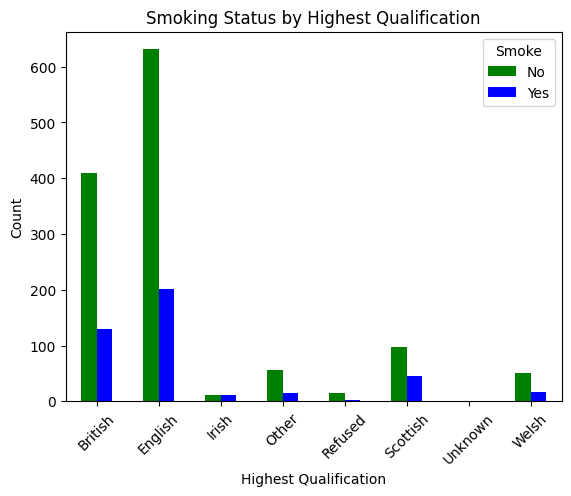

In [ ]:
colors=['green', 'blue']
group_by_nationality.plot(kind='bar', color=colors)
plt.title('Smoking Status by Highest Qualification')
plt.xlabel('Highest Qualification')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Smoke')
plt.show()

# calculate are there correlation between age and smoking behavior

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = df[(df['age'] >= df['age'].min()) & (df['age'] <= df['age'].max()+1)]

le_age = LabelEncoder()

df['age_range_label'] = le_age.fit_transform(df['age_range'])
unique_labels = df['age_range_label'].unique()
unique_labels = sorted(unique_labels)
df['smoke'] = le_age.fit_transform(df['smoke'])

temp_array=[]

X = df[['age_range_label']]
y = df['smoke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_binary = (y_pred_prob >= 0.34).astype(int)



In [ ]:
print(model.score(X_test, y_test))


0.7649667405764967


calculate expected value using logistic regression

In [ ]:
# this is for expected value
temp = [];
temp_dataframe = pd.DataFrame()
yes_smoke_array = []
no_smoke_array = []

for i in unique_labels :
  print(i.reshape(-1,1))
  temp.append(model.predict_proba(i.reshape(-1,1)))

for i in range(len(temp)) :
  temp[i] = np.array(temp[i]).flatten()

#this is for calculate the expected value
label = 0
for i in temp:
    count = len(df[(df['age_range_label'] == label)])
    no_smoke_array.append(i[0] * count)
    yes_smoke_array.append(i[1] * count)

    label += 1

# Print or use yes_smoke_array and no_smoke_array as needed
# print(yes_smoke_array)
# print(no_smoke_array)
temp_dataframe = pd.DataFrame(temp, columns=['prob_of_no', 'prob_of_yes'])
temp_dataframe['yes_smoke'] = yes_smoke_array
temp_dataframe['no_smoke'] = no_smoke_array
temp_dataframe['age_range'] = sorted(df['age_range'].unique())
temp_dataframe

[[0]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[9]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

,prob_of_no,prob_of_yes,yes_smoke,no_smoke,age_range
0,0.527273,0.472727,68.545351,76.454649,16-23
1,0.579646,0.420354,86.593002,119.406998,24-31
2,0.630284,0.369716,103.520475,176.479525,32-39
3,0.678209,0.321791,70.794075,149.205925,40-47
4,0.722655,0.277345,55.191694,143.808306,48-55
5,0.763106,0.236894,45.957394,148.042606,56-63
6,0.799296,0.200704,38.535111,153.464889,64-71
7,0.831181,0.168819,30.218646,148.781354,72-79
8,0.858894,0.141106,8.466352,51.533648,80-87
9,0.882700,0.117300,1.876798,14.123202,88-96


calculate expected value using traditional approach

In [ ]:
# Sample contingency table
contingency_table = pd.crosstab(df['age_range'], df['smoke'])
# Calculate expected frequencies
expected_frequencies = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / contingency_table.sum().sum()
# Perform chi-square test
res = chi2_contingency(contingency_table)

# Display results
contingency_table['expected_yes'] = expected_frequencies[:, 1]
contingency_table['expected_no'] = expected_frequencies[:, 0]
contingency_table

smoke,0,1,expected_yes,expected_no
age_range,,,,
16-23,91,54,36.099941,108.900059
24-31,127,79,51.286813,154.713187
32-39,200,80,69.710231,210.289769
40-47,152,68,54.772324,165.227676
48-55,147,52,49.544057,149.455943
56-63,157,37,48.299231,145.700769
64-71,165,27,47.801301,144.198699
72-79,159,20,44.564755,134.435245
80-87,57,3,14.937907,45.062093


In [ ]:

# plt.figure(figsize=(10, 6))
# plt.scatter(X['age'], y, c=y, cmap=plt.cm.RdYlBu, edgecolor='k', s=100, label='Data points')
# plt.plot(xx, probabilities, color='black', linewidth=2, label='Probability of being a smoker')
# plt.axhline(0.5, color='grey', linestyle='--', linewidth=1, label='Decision boundary (p=0.5)')
# plt.xlabel('Age')
# plt.ylabel('Probability of Smoking')
# plt.title('Logistic Regression Decision Boundary')
# plt.legend()
# plt.show()


#calculate are there correlation between **income** and smoking behavior

In [ ]:
df_by_income=df.groupby(['gross_income', 'smoke']).size().unstack(fill_value=0)


In [ ]:
# Sample contingency table
con_table_income = pd.crosstab(df['marital_status'], df['smoke'])
# Calculate expected frequencies
expected_frequencies = np.outer(con_table_income.sum(axis=1), con_table_income.sum(axis=0)) / con_table_income.sum().sum()
# Perform chi-square test
res = chi2_contingency(con_table_income)

In [ ]:
# this is using chi square fit of test
print(res)

Chi2ContingencyResult(statistic=74.97978582715777, pvalue=2.0123016499765445e-15, dof=4, expected_freq=array([[120.91661739,  40.08338261],
       [609.84033116, 202.15966884],
       [ 51.07037256,  16.92962744],
       [320.69189829, 106.30810171],
       [167.4807806 ,  55.5192194 ]]))


In [ ]:
# this is for calculate the expected value of gross_income using logistic regression

le_income = LabelEncoder()

df['gross_income'] = le_age.fit_transform(df['gross_income'])
unique_labels = df['gross_income'].unique()
unique_labels = sorted(unique_labels)
df['smoke'] = le_age.fit_transform(df['smoke'])

temp_array=[]

X = df[['gross_income']]
y = df['smoke']

X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(X, y, test_size=0.5, random_state=42)
model_income = LogisticRegression()
model_income.fit(X_train_income, y_train_income)

y_pred_prob = model_income.predict_proba(X_test_income)[:, 1]
y_pred_binary = (y_pred_prob >= 0.34).astype(int)

In [ ]:
model_income.score(X_train_income, y_train_income)

0.7372781065088757

In [ ]:
temp = [];
yes_smoke_array = []
no_smoke_array = []

for i in unique_labels :
  print(i.reshape(-1,1))
  temp.append(model_income.predict_proba(i.reshape(-1,1)))

for i in range(len(temp)) :
  temp[i] = np.array(temp[i]).flatten()

#this is for calculate the expected value
label = 0
for i in temp:
    count = len(df[(df['gross_income'] == label)])
    no_smoke_array.append(i[0] * count)
    yes_smoke_array.append(i[1] * count)

    label += 1

# Print or use yes_smoke_array and no_smoke_array as needed
# print(yes_smoke_array)
# print(no_smoke_array)
temp_dataframe = pd.DataFrame(temp, columns=['prob_of_no', 'prob_of_yes'])
temp_dataframe['yes_smoke'] = yes_smoke_array
temp_dataframe['no_smoke'] = no_smoke_array
temp_dataframe['gross_income'] = sorted(df['gross_income'].unique())
temp_dataframe

[[0]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]
[[8]]
[[9]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

,prob_of_no,prob_of_yes,yes_smoke,no_smoke,gross_income
0,0.704398,0.295602,79.221424,188.778576,0
1,0.714044,0.285956,53.759787,134.240213,1
2,0.723498,0.276502,71.060887,185.939113,2
3,0.732758,0.267242,41.422558,113.577442,3
4,0.741817,0.258183,20.396420,58.603580,4
5,0.750675,0.249325,98.732851,297.267149,5
6,0.759326,0.240674,21.419942,67.580058,6
7,0.767771,0.232229,25.080730,82.919270,7
8,0.776007,0.223993,29.791114,103.208886,8
9,0.784032,0.215968,3.887417,14.112583,9


#calculate are there correlation between **gender** and smoking behavior

In [ ]:
# Sample contingency table
con_table_income = pd.crosstab(df['highest_qualification'], df['smoke'])
# Calculate expected frequencies
expected_frequencies = np.outer(con_table_income.sum(axis=1), con_table_income.sum(axis=0)) / con_table_income.sum().sum()
# Perform chi-square test
res = chi2_contingency(con_table_income)

In [ ]:
res

Chi2ContingencyResult(statistic=40.281076408530254, pvalue=1.112078360226584e-06, dof=7, expected_freq=array([[ 78.85866351,  26.14133649],
       [196.77114134,  65.22885866],
       [ 76.60555884,  25.39444116],
       [231.3187463 ,  76.6812537 ],
       [ 93.87936132,  31.12063868],
       [440.10644589, 145.89355411],
       [ 57.07865169,  18.92134831],
       [ 95.38143111,  31.61856889]]))

In [ ]:
le_income = LabelEncoder()

df['highest_qualification'] = le_age.fit_transform(df['highest_qualification'])
unique_labels = df['highest_qualification'].unique()
unique_labels = sorted(unique_labels)
df['smoke'] = le_age.fit_transform(df['smoke'])

temp_array=[]

X = df[['highest_qualification']]
y = df['smoke']

X_train_qualification, X_test_qualification, y_train_qualification, y_test_qualification = train_test_split(X, y, test_size=0.5, random_state=42)
model_qualification = LogisticRegression()
model_qualification.fit(X_train_qualification, y_train_qualification)

y_pred_prob = model_qualification.predict_proba(X_test_qualification)[:, 1]
y_pred_binary = (y_pred_prob >= 0.34).astype(int)

In [ ]:
print(model_qualification.score(X_test_qualification, y_test_qualification))

0.764775413711584


In [ ]:
temp = [];
yes_smoke_array = []
no_smoke_array = []

for i in unique_labels :
  print(i.reshape(-1,1))
  temp.append(model_qualification.predict_proba(i.reshape(-1,1)))

for i in range(len(temp)) :
  temp[i] = np.array(temp[i]).flatten()

#this is for calculate the expected value
label = 0
for i in temp:
    count = len(df[(df['highest_qualification'] == label)])
    no_smoke_array.append(i[0] * count)
    yes_smoke_array.append(i[1] * count)

    label += 1

temp_dataframe = pd.DataFrame(temp, columns=['prob_of_no', 'prob_of_yes'])
temp_dataframe['yes_smoke'] = yes_smoke_array
temp_dataframe['no_smoke'] = no_smoke_array
temp_dataframe['highest_qualification'] = sorted(df['highest_qualification'].unique())
temp_dataframe

[[0]]
[[1]]
[[2]]
[[3]]
[[4]]
[[5]]
[[6]]
[[7]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

,prob_of_no,prob_of_yes,yes_smoke,no_smoke,highest_qualification
0,0.767420,0.232580,24.420848,80.579152,0
1,0.759433,0.240567,63.028429,198.971571,1
2,0.751261,0.248739,25.371370,76.628630,2
3,0.742905,0.257095,79.185251,228.814749,3
4,0.734368,0.265632,33.204059,91.795941,4
5,0.725651,0.274349,160.768385,425.231615,5
6,0.716759,0.283241,21.526300,54.473700,6
7,0.707695,0.292305,37.122723,89.877277,7
